##### import the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

##### configure the plot style

In [2]:
plt.style.use('seaborn')
plt.rc('font', size=12) # controls default text sizes
plt.rc('axes', titlesize=18) # fontsize of the axes title
plt.rc('axes', labelsize=16) # fontsize of the x and y labels
plt.rc('xtick', labelsize=14) # fontsize of the x tick labels
plt.rc('ytick', labelsize=14) # fontsize of the y tick labels
plt.rc('legend', fontsize=14) # legend fontsize
plt.rc('figure', titlesize=18) # fontsize of the figure title
plt.rc('figure', figsize=(10,8)) # size of the figure

# Practice Peer-graded Assignment: Visualization and Imputation

### Instructions

Now that you've learned about summarizing information with data visualization and handling missing data with imputation, it's time to apply these skills to a real-world case. 

With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:
- Investigate the extent and nature of the missing data
- Design and implement an imputation technique for the missing data
- Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset

### Task 1 - Investigate the extent and nature of the missing data
Investigate the new dataset and upload a visualization or multiple visualizations that summarize the nature and extent of the missing data. Be sure to include text to make your visualization clearer. Hint: You can add multiple plots to one figure in Python with matplotlib using the .subplots method.

#### Grading criteria
- Did the learner upload at least one visualization related to the nature and extent of the missing data in the new AAVAIL dataset?
- Did the learner add labels, titles, and/or other elements to help make their visualization(s) clearer?

### Solution:

#### Reading the data and investigate the missing values

In [3]:
data = pd.read_csv('../data/aavail-data-visualization.csv')
data.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [4]:
data.info() # summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
data.shape # data shape (objectives, features)

(1000, 7)

In [6]:
data.dtypes # features data type

customer_id          int64
country_name        object
age                float64
customer_name       object
is_subscriber         bool
subscriber_type     object
num_streams        float64
dtype: object

In [7]:
data.isnull().sum(axis=0) # features missing values

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

#### Visualization of the missing data

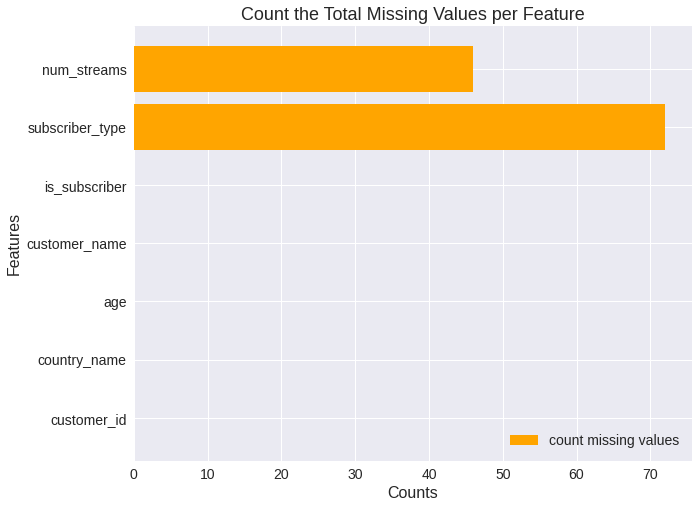

In [8]:
# plot the count of all missing values per feature in the data set (horizontal bar chart)

features = [f for f in data]
counts = [c for c in data.isnull().sum(axis=0)]

plt.barh(features, counts, label='count missing values', color='orange')
plt.title('Count the Total Missing Values per Feature')
plt.xlabel("Counts")
plt.ylabel("Features")
plt.legend(loc="lower right")
plt.show()

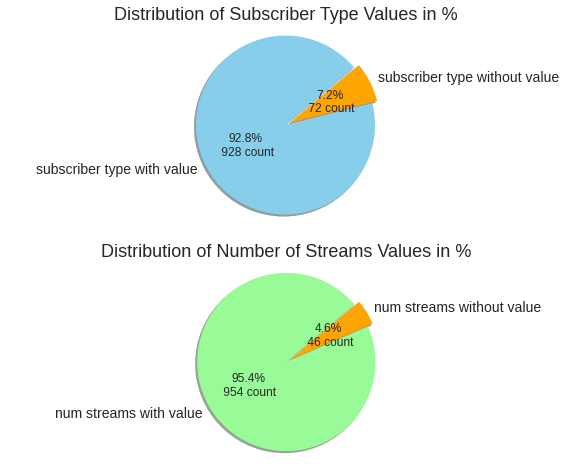

In [9]:
# plot the distributions of the features with missing values for 
# all customers (with values / missing values) in % (pie chart)

subscriber_type_val = data['subscriber_type'].notnull().sum()
subscriber_type_nan = data['subscriber_type'].isnull().sum()

num_streams_val = data['num_streams'].notnull().sum()
num_streams_nan = data['num_streams'].isnull().sum()

x1 = [subscriber_type_val, subscriber_type_nan]
autopct1 = lambda p: f'{p:.1f}%\n {(p * sum(x1) / 100):.0f} count'
explode1 = [0.03 for _ in range(len(x1))]
labels1 = [
    'subscriber type with value', 
    'subscriber type without value',
]

x2 = [num_streams_val, num_streams_nan]
autopct2 = lambda p: f'{p:.1f}%\n {(p * sum(x2) / 100):.0f} count'
explode2 = [0.03 for _ in range(len(x2))]
labels2 = [
    'num streams with value', 
    'num streams without value',
]

plt.subplot(2, 1, 1)
plt.pie(
    x=x1, 
    labels=labels1, 
    autopct=autopct1, 
    explode=explode1, 
    shadow=True, startangle=40, 
    labeldistance=1.1, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Subscriber Type Values in %')
plt.axis('equal')

plt.subplot(2, 1, 2)
plt.pie(
    x=x2, 
    labels=labels2, 
    autopct=autopct2, 
    explode=explode2, 
    shadow=True, 
    startangle=40, 
    labeldistance=1.1, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of Number of Streams Values in %')
plt.axis('equal')    

plt.show()

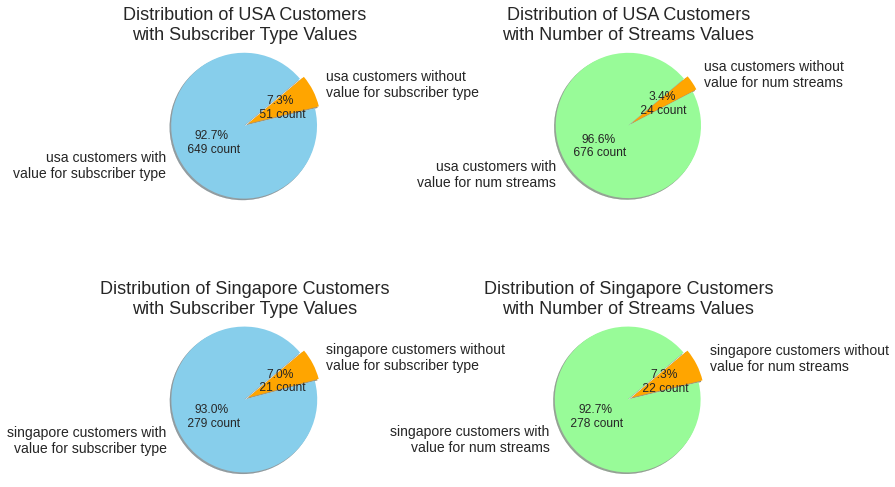

In [10]:
# plot the distributions of the customers from different countries with missing values
# (customers with values / customers with missing values) in % (pie chart)

usa_subscriber_type_val = ((data['country_name'] == 'united_states') & (data['subscriber_type'].notnull())).sum()
usa_subscriber_type_nan = ((data['country_name'] == 'united_states') & (data['subscriber_type'].isnull())).sum()

usa_num_streams_val = ((data['country_name'] == 'united_states') & (data['num_streams'].notnull())).sum()
usa_num_streams_nan = ((data['country_name'] == 'united_states') & (data['num_streams'].isnull())).sum()

singapore_subscriber_type_val = ((data['country_name'] == 'singapore') & (data['subscriber_type'].notnull())).sum()
singapore_subscriber_type_nan = ((data['country_name'] == 'singapore') & (data['subscriber_type'].isnull())).sum()

singapore_num_streams_val = ((data['country_name'] == 'singapore') & (data['num_streams'].notnull())).sum()
singapore_num_streams_nan = ((data['country_name'] == 'singapore') & (data['num_streams'].isnull())).sum()

x3 = [usa_subscriber_type_val, usa_subscriber_type_nan]
autopct3 = lambda p: f'{p:.1f}%\n {(p * sum(x3) / 100):.0f} count'
explode3 = [0.03 for _ in range(len(x3))]
labels3 = [
    'usa customers with\nvalue for subscriber type', 
    'usa customers without\nvalue for subscriber type',
]

x4 = [usa_num_streams_val, usa_num_streams_nan]
autopct4 = lambda p: f'{p:.1f}%\n {(p * sum(x4) / 100):.0f} count'
explode4 = [0.03 for _ in range(len(x4))]
labels4 = [
    'usa customers with\nvalue for num streams', 
    'usa customers without\nvalue for num streams',
]

x5 = [singapore_subscriber_type_val, singapore_subscriber_type_nan]
autopct5 = lambda p: f'{p:.1f}%\n {(p * sum(x5) / 100):.0f} count'
explode5 = [0.03 for _ in range(len(x5))]
labels5 = [
    'singapore customers with\nvalue for subscriber type', 
    'singapore customers without\nvalue for subscriber type',
]

x6 = [singapore_num_streams_val, singapore_num_streams_nan]
autopct6 = lambda p: f'{p:.1f}%\n {(p * sum(x6) / 100):.0f} count'
explode6 = [0.03 for _ in range(len(x6))]
labels6 = [
    'singapore customers with\nvalue for num streams', 
    'singapore customers without\nvalue for num streams',
]

plt.subplot(2, 2, 1)
plt.pie(
    x=x3, 
    labels=labels3, 
    autopct=autopct3, 
    explode=explode3, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of USA Customers\nwith Subscriber Type Values')
plt.axis('equal')

plt.subplot(2, 2, 2)
plt.pie(
    x=x4, 
    labels=labels4, 
    autopct=autopct4, 
    explode=explode4, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of USA Customers\nwith Number of Streams Values')
plt.axis('equal')

plt.subplot(2, 2, 3)
plt.pie(
    x=x5, 
    labels=labels5, 
    autopct=autopct5, 
    explode=explode5, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Singapore Customers\nwith Subscriber Type Values')
plt.axis('equal')

plt.subplot(2, 2, 4)
plt.pie(
    x=x6, 
    labels=labels6, 
    autopct=autopct6, 
    explode=explode6, 
    shadow=True, startangle=40, 
    labeldistance=1.2, 
    pctdistance=0.5,
    colors=[
        'palegreen',
        'orange',
    ]
)
plt.title('Distribution of Singapore Customers\nwith Number of Streams Values')
plt.axis('equal')

plt.subplots_adjust(wspace=1.2, hspace=0.7)
plt.show()

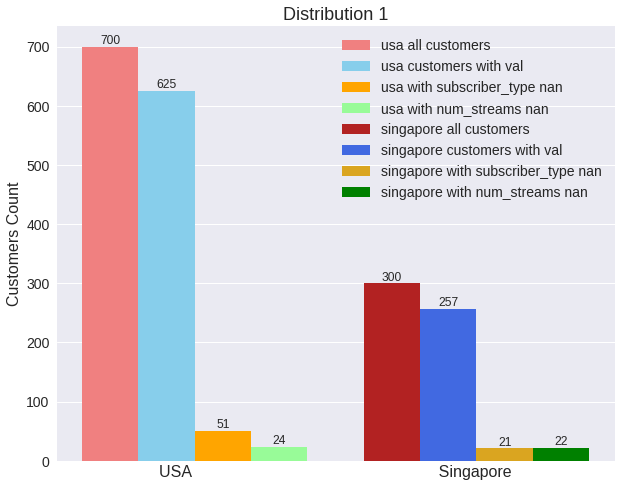

In [11]:
# plot the distribution of customers from different countries that have missing values (bar chart Var I)

usa_customers = (data['country_name'] == 'united_states').sum()
usa_customers_val = usa_customers-usa_subscriber_type_nan-usa_num_streams_nan
singapore_customers = (data['country_name'] == 'singapore').sum()
singapore_customers_val = singapore_customers-singapore_subscriber_type_nan-singapore_num_streams_nan

x = np.arange(1)
width = 0.2

b1 = plt.bar(
    x, 
    [usa_customers],
    width,
    color='lightcoral',
    label='usa all customers',
)
b2 = plt.bar(
    x+width,
    [usa_customers_val],
    width, 
    color='skyblue',
    label='usa customers with val',
)
b3 = plt.bar(
    x+width*2,
    [usa_subscriber_type_nan],
    width,
    color='orange',
    label='usa with subscriber_type nan',
)
b4 = plt.bar(
    x+width*3, 
    [usa_num_streams_nan], 
    width, 
    color='palegreen',
    label='usa with num_streams nan',
)
b5 = plt.bar(
    x+width*5, 
    [singapore_customers],
    width, 
    color='firebrick',
    label='singapore all customers',
)
b6 = plt.bar(
    x+width*6,
    [singapore_customers_val],
    width,
    color='royalblue',
    label='singapore customers with val',
)
b7 = plt.bar(
    x+width*7,
    [singapore_subscriber_type_nan],
    width,
    color='goldenrod',
    label='singapore with subscriber_type nan',
)
b8 = plt.bar(
    x+width*8,
    [singapore_num_streams_nan],
    width, 
    color='green',
    label='singapore with num_streams nan',
)

bars = [b1, b2, b3, b4, b5, b6, b7, b8]

for i in range(len(bars)):
    plt.bar_label(bars[i])

plt.title('Distribution 1')
plt.xlabel(f'USA{" "*55}Singapore')
plt.ylabel("Customers Count")
plt.xticks([])
plt.legend(loc="upper right")
plt.show()

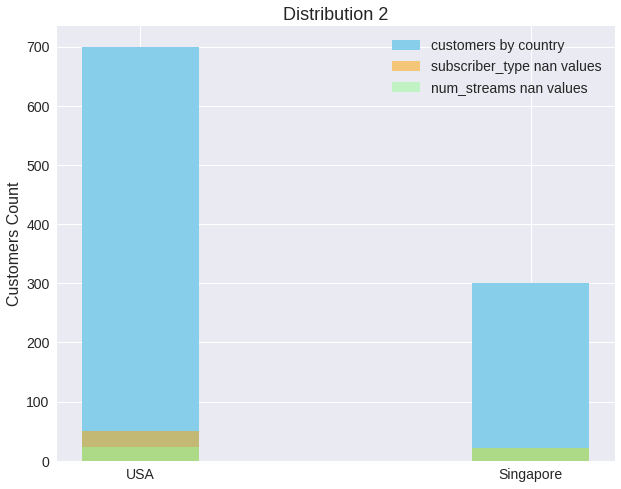

In [12]:
# plot the distribution of customers from different countries that have missing values (bar chart Var II)

total_customers_count = [usa_customers, singapore_customers]
subscriber_type_nan = [usa_subscriber_type_nan, singapore_subscriber_type_nan]
num_streams_nan = [usa_num_streams_nan, singapore_num_streams_nan]
countries_name = ['USA', 'Singapore']

plt.bar(
    countries_name,
    total_customers_count, 
    label='customers by country',
    color='skyblue',
    alpha=1,
    width=0.3,
)
plt.bar(
    countries_name,
    subscriber_type_nan,
    label='subscriber_type nan values',
    color='orange',
    alpha=0.5,
    width=0.3,
)
plt.bar(
    countries_name,
    num_streams_nan,
    label='num_streams nan values',
    color='palegreen',
    alpha=0.5,
    width=0.3,
)

plt.title('Distribution 2')
plt.ylabel("Customers Count")
plt.legend(loc="upper right")
plt.show()

#### Investigation summary
Based on data research and missing values, we come to the following conclusion:

    Total number of missing values:
    - 118

    Number of missing values by features:
    - subscriber_type - 72
    - num_streams - 46

    Missing values by features in percents:
    - subscriber_type - 7.2 %
    - num_streams - 4.6 %

    Number of missing values by country:
    - USA
     - subscriber_type - 51
     - num_streams - 24
    - Singapore
     - subscriber_type - 21
     - num_streams - 22

    Missing values by country in percents:
    - USA
     - subscriber_type - 7.3 %
     - num_streams - 3.4 %
    - Singapore
     - subscriber_type - 7.0 %
     - num_streams - 7.3 %
     
For the "subscriber_type" parameter, values are missing 7.2 % of the cases in the total data set. It can be seen that after the data set is divided into customers from different countries, approximately 7 % of the values in each department are missing. Therefore, a similar impact on model forecasting is expected later in the process

For the parameter "num_streams" values are missing 4.5% of the cases in the total data set. It can be seen that after the data set is divided into customers from different countries, 3.4% of the values are missing in the US part and 7.3% in the part. Due to the uneven missing value in both parts, a greater impact on the further development of the forecasting model is expected.

### Task 2 - Design and implement an imputation technique for the missing data
Based on your investigation of the missing data, design and implement an imputation technique (or multiple techniques) to replace them. Describe your approach in 3-5 sentences. Be sure to include a brief discussion of the assumptions you made about the missing data, if any, that led you to implement this particular imputation strategy.

#### Grading criteria
- Did the learner describe a reasonable strategy for imputing the missing data?
- Did the learner discuss the assumptions they made about the missing data prior to defining an imputation strategy?

### Solution:

#### Preparation of a new data set for correlation and visualization between the features

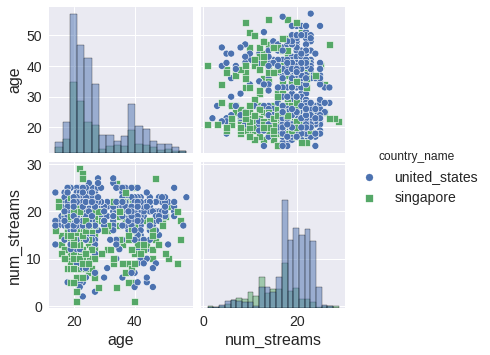

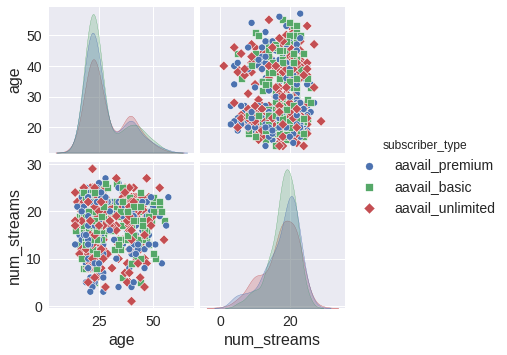

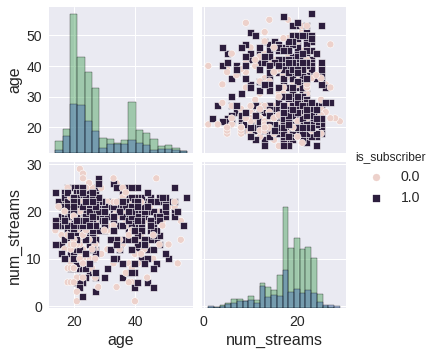

In [13]:
# plot a univariate distribution to show the marginal distribution of the data in each important feature

sns.pairplot(
    data=data,
    vars=['age', 'num_streams'],
    hue='country_name',
    diag_kind='hist',
    kind='scatter',
    dropna=True,
    markers=['o', 's'],
);

sns.pairplot(
    data=data,
    vars=['age', 'num_streams'],
    hue='subscriber_type',
    diag_kind='kde',
    kind='scatter',
    dropna=True,
    markers=['o', 's', 'D'],
);

sns.pairplot(
    data=data,
    vars=['age', 'num_streams'],
    hue='is_subscriber',
    diag_kind='hist',
    kind='scatter',
    dropna=True,
    markers=['o', 's'],
);

In [14]:
# create a copy of the data set and prepare it for correlation matrix

le = LabelEncoder()
data_corr = data.copy(deep=True)
data_corr = data_corr.drop(['customer_id', 'customer_name'], axis=1)
data_corr.dropna(inplace=True)
data_corr = pd.get_dummies(data_corr)
data_corr['is_subscriber'] = le.fit_transform(data_corr['is_subscriber'])

In [15]:
data_corr.head() # check the new corr data set

,age,is_subscriber,num_streams,country_name_singapore,country_name_united_states,subscriber_type_aavail_basic,subscriber_type_aavail_premium,subscriber_type_aavail_unlimited
0,21.0,1,23.0,0,1,0,1,0
2,22.0,0,22.0,0,1,0,1,0
3,21.0,1,19.0,0,1,1,0,0
4,22.0,1,23.0,1,0,0,1,0
6,49.0,0,18.0,1,0,1,0,0


In [16]:
data_corr.shape # check the shape of the corr data set

(883, 8)

In [17]:
data_corr.dtypes # check the data type of the corr data set features

age                                 float64
is_subscriber                         int64
num_streams                         float64
country_name_singapore                uint8
country_name_united_states            uint8
subscriber_type_aavail_basic          uint8
subscriber_type_aavail_premium        uint8
subscriber_type_aavail_unlimited      uint8
dtype: object

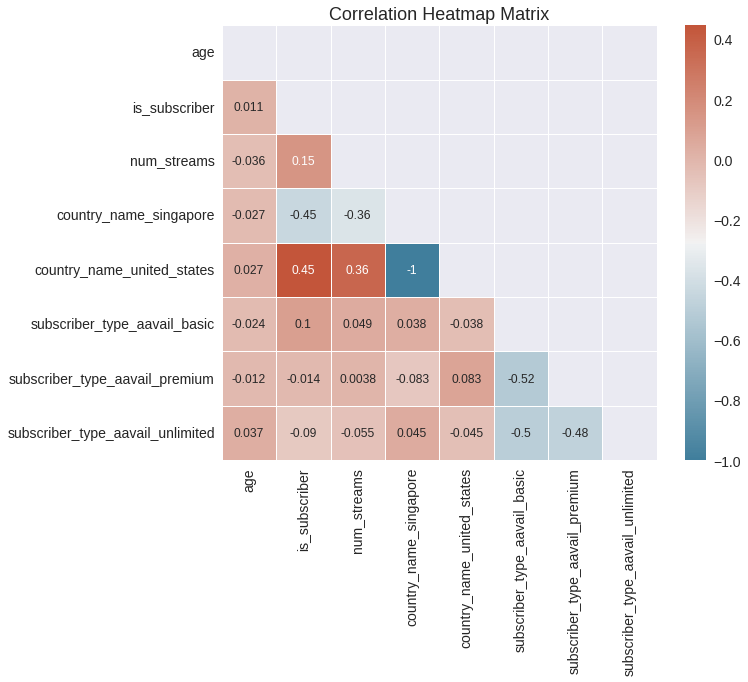

In [18]:
# plot corr heatmap matrix

corr = data_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    data=corr,
    mask=mask, 
    annot=True, 
    cmap=cmap, 
    square=True, 
    linewidths=.5,
)
plt.title('Correlation Heatmap Matrix')
plt.show()

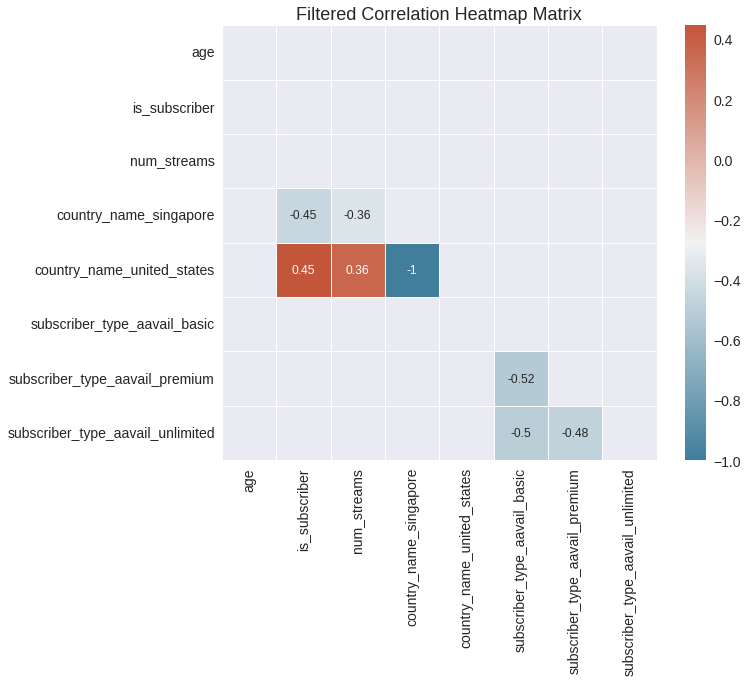

In [19]:
# plot filtered corr heatmap matrix (pos corr >= 0.35, neg corr <= -0.35)

filtered_corr = corr[((corr >= .35) | (corr <= -.35)) & (corr != 1.000)]

sns.heatmap(
    data=filtered_corr,
    mask=mask, 
    annot=True, 
    cmap=cmap, 
    square=True, 
    linewidths=.5,
)
plt.title('Filtered Correlation Heatmap Matrix')
plt.show()

In [20]:
# show the strongest positive corr in data frame

pos_corr = corr[(corr >= .35) & (corr != 1.000)].unstack().sort_values().drop_duplicates().dropna()
pos_corr = pos_corr.to_frame('pos_corr').reset_index()
pos_corr

,level_0,level_1,pos_corr
0,num_streams,country_name_united_states,0.364939
1,is_subscriber,country_name_united_states,0.445329


In [21]:
# show the strongest negative corr in data frame

neg_corr = corr[(corr <= -.35) & (corr != 1.000)].unstack().sort_values().drop_duplicates().dropna()
neg_corr = neg_corr.to_frame('neg_corr').reset_index()
neg_corr

,level_0,level_1,neg_corr
0,country_name_singapore,country_name_united_states,-1.000000
1,subscriber_type_aavail_basic,subscriber_type_aavail_premium,-0.523500
2,subscriber_type_aavail_basic,subscriber_type_aavail_unlimited,-0.500921
3,subscriber_type_aavail_premium,subscriber_type_aavail_unlimited,-0.475191
4,is_subscriber,country_name_singapore,-0.445329
5,num_streams,country_name_singapore,-0.364939


#### correlation summary and strategy for imputing the missing data

After checking the correlation between the features, it is clear that there is a strong positive correlation between the country_name_united_states: num_streams and is_subscriber: num_streams

In the case of a strongly negative correlation, the same features are observed, as the variable subscriber_type is also present.

In view of the results obtained, we can undertake the following imputations:

 - subscriber_type - will be imputed to the most frequently values by univariate algorithm

 - num_streams - will be imputed to mean value by univariate algorithm


#### imputation missing data - subscriber_type

In [22]:
# use SimpleImputer with most_frequent strategy to impute the subscribe_type

subscriber_type_imputer = SimpleImputer(strategy='most_frequent')
data['subscriber_type'] = subscriber_type_imputer.fit_transform(data['subscriber_type'].values.reshape(-1,1))

In [23]:
data.isnull().sum(axis=0) # check features missing values

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type     0
num_streams        46
dtype: int64

#### imputation missing data - num_streams

In [24]:
# use SimpleImputer with mean strategy to impute the num_streams

num_streams_imputer = SimpleImputer(strategy='mean')
data['num_streams'] = num_streams_imputer.fit_transform(data['num_streams'].values.reshape(-1,1))

In [25]:
data.isnull().sum(axis=0) # check features missing values

customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64

### Task 3 - Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset
Recall from your earlier case work that you are trying to investigate AAVAIL's market situations in the United States and Singapore. Use your updated dataset (with the imputed data) to create a summary visualization or visualizations that compare and/or contrast AAVAIL's market churn in the US and Singapore. Note that in the dataset if a user is not subscribed (is_subscribed = FALSE) to the service they were previously subscribed to (subscriber_type), this indicates that they have churned. 

Be sure to include text in the form of labels, titles, and descriptions to make your visualization clearer. Upload a file containing one or more of your visualizations. Hint: You can add multiple plots to one figure in Python with matplotlib using the .subplots method

#### Grading criteria
- Did the learner upload at least one visualization referencing AAVAIL's offerings in the United States and Singapore?
- Does the learner's visualization highlight differences in AAVAIL's market churn situations in the United States and Singapore with reference to other variables in the dataset?

### Solution: